# Backtest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Load Apple data (AAPL.csv)
# The file should contain at least a column named 'Adj Close' or 'Adj_Close'
df = pd.read_csv("AAPL.csv")

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop missing values
df = df.dropna(subset=['Adj Close'])


In [2]:
df['Future_Return'] = df['Adj Close'].shift(-1) / df['Adj Close'] - 1
df = df.dropna(subset=['Future_Return'])  # drop last NaN


In [3]:
np.random.seed(42)  # for reproducibility

df['long_only_signal'] = np.random.choice([0, 1], size=len(df), p=[0.5, 0.5])


In [4]:
# Daily PnL (since we invest $1, PnL = return when signal=1)
df['PnL_signal'] = df['Future_Return'] * df['long_only_signal']


In [5]:
total_invested = df['long_only_signal'].sum()       # number of times we invested
total_earned = (df['PnL_signal'] + df['long_only_signal']).sum()  # $1 + return for invested days

strategy_return = (total_earned - total_invested) / total_invested
print(f"Strategy total return: {strategy_return:.4f}")


Strategy total return: 0.0013


In [6]:
df['always_buy_signal'] = 1
df['PnL_always'] = df['Future_Return'] * df['always_buy_signal']

# Total return for always-buy
total_invested_always = df['always_buy_signal'].sum()
total_earned_always = (df['PnL_always'] + df['always_buy_signal']).sum()
strategy_return_always = (total_earned_always - total_invested_always) / total_invested_always

print(f"Always-buy total return: {strategy_return_always:.4f}")


Always-buy total return: 0.0011


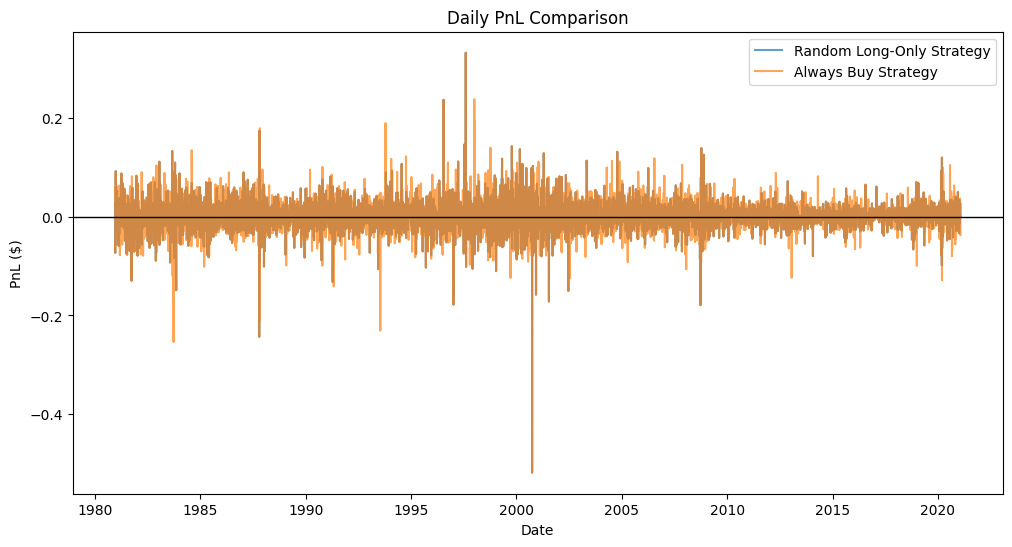

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PnL_signal'], label='Random Long-Only Strategy', alpha=0.7)
plt.plot(df.index, df['PnL_always'], label='Always Buy Strategy', alpha=0.7)
plt.axhline(0, color='black', lw=1)
plt.title('Daily PnL Comparison')
plt.xlabel('Date')
plt.ylabel('PnL ($)')
plt.legend()
plt.show()
